## Setting up my environment

Note: Loading up the `tidyverse` and `conflicted` packages to manage conflicts

In [1]:
## ----tidyverse---------------------------------------------------------------------------------------------------------
library(tidyverse)
library(conflicted)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



### Setting dplyr::filter and dplyr::lag as the default choices

In [2]:
## ----------------------------------------------------------------------------------------------------------------------
conflict_prefer("filter", "dplyr")
conflict_prefer("lag", "dplyr")

[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::lag over any other package.


# Step 1: Collect data

### Uploading the datasets 
Notes: The datasets are from Q1 of 2019 and Q1 of 2020

In [3]:
## ----loading datasets--------------------------------------------------------------------------------------------------
q1_2019 <- read_csv("C:/Users/giorg/Documents/RStudio/Projects/9728881/Course 8/Case Study 1/Divvy_Trips_2019_Q1.csv")
q1_2020 <- read_csv("C:/Users/giorg/Documents/RStudio/Projects/9728881/Course 8/Case Study 1/Divvy_Trips_2020_Q1.csv")

Rows: 365069 Columns: 12
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): from_station_name, to_station_name, usertype, gender
dbl  (5): trip_id, bikeid, from_station_id, to_station_id, birthyear
num  (1): tripduration
dttm (2): start_time, end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 426887 Columns: 13
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): ride_id, rideable_type, start_station_name, end_station_name, memb...
dbl  (6): start_station_id, end_station_id, start_lat, start_lng, end_lat, e...
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this 

### Inspecting the data

In [4]:
## ----------------------------------------------------------------------------------------------------------------------
glimpse(q1_2019)
glimpse(q1_2020)

Rows: 365,069
Columns: 12
$ trip_id           <dbl> 21742443, 21742444, 21742445, 21742446, 21742447, 21…
$ start_time        <dttm> 2019-01-01 00:04:37, 2019-01-01 00:08:13, 2019-01-0…
$ end_time          <dttm> 2019-01-01 00:11:07, 2019-01-01 00:15:34, 2019-01-0…
$ bikeid            <dbl> 2167, 4386, 1524, 252, 1170, 2437, 2708, 2796, 6205,…
$ tripduration      <dbl> 390, 441, 829, 1783, 364, 216, 177, 100, 1727, 336, …
$ from_station_id   <dbl> 199, 44, 15, 123, 173, 98, 98, 211, 150, 268, 299, 2…
$ from_station_name <chr> "Wabash Ave & Grand Ave", "State St & Randolph St", …
$ to_station_id     <dbl> 84, 624, 644, 176, 35, 49, 49, 142, 148, 141, 295, 4…
$ to_station_name   <chr> "Milwaukee Ave & Grand Ave", "Dearborn St & Van Bure…
$ usertype          <chr> "Subscriber", "Subscriber", "Subscriber", "Subscribe…
$ gender            <chr> "Male", "Female", "Female", "Male", "Male", "Female"…
$ birthyear         <dbl> 1989, 1990, 1994, 1993, 1994, 1983, 1984, 1990, 1995…
Rows: 426,887


# Step 2: Wrangle data and combine into a single file

### Renaming columns of q1_2019 to make them consistent with q1_2020 
Note: This will be the supposed going-forward table design for Divvy

In [5]:
## ----------------------------------------------------------------------------------------------------------------------

(q1_2019 <- rename(q1_2019
                   ,ride_id = trip_id
                   ,rideable_type = bikeid
                   ,started_at = start_time
                   ,ended_at = end_time
                   ,start_station_name = from_station_name
                   ,start_station_id = from_station_id
                   ,end_station_name = to_station_name
                   ,end_station_id = to_station_id
                   ,member_casual = usertype
                   ))

ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989
21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990
21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994
21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,1783,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993
21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994
21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,216,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983
21742449,2019-01-01 00:16:06,2019-01-01 00:19:03,2708,177,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Male,1984
21742450,2019-01-01 00:18:41,2019-01-01 00:20:21,2796,100,211,St. Clair St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1990
21742451,2019-01-01 00:18:43,2019-01-01 00:47:30,6205,1727,150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995


### Inspecting the dataframes again to look for incongruencies

In [6]:
## ----------------------------------------------------------------------------------------------------------------------
str(q1_2019)
str(q1_2020)

spc_tbl_ [365,069 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : num [1:365069] 21742443 21742444 21742445 21742446 21742447 ...
 $ started_at        : POSIXct[1:365069], format: "2019-01-01 00:04:37" "2019-01-01 00:08:13" ...
 $ ended_at          : POSIXct[1:365069], format: "2019-01-01 00:11:07" "2019-01-01 00:15:34" ...
 $ rideable_type     : num [1:365069] 2167 4386 1524 252 1170 ...
 $ tripduration      : num [1:365069] 390 441 829 1783 364 ...
 $ start_station_id  : num [1:365069] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:365069] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:365069] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:365069] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr [1:365069] "Subscriber" "Subscriber" "

### Converting ride_id and rideable_type to character so that they can stack correctly

In [7]:
## ----------------------------------------------------------------------------------------------------------------------
q1_2019 <-  mutate(q1_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type))

### Stacking individual quarter's data frames into one big data frame

In [8]:
## ----------------------------------------------------------------------------------------------------------------------
all_trips <- bind_rows(q1_2019, q1_2020)#, q3_2019)#, q4_2019, q1_2020)

### Removing lat, long, birthyear, and gender fields as 
Note: this data was dropped beginning in 2020

In [9]:
## ----------------------------------------------------------------------------------------------------------------------
all_trips <- all_trips %>%  
  select(-c(start_lat, start_lng, end_lat, end_lng, birthyear, gender,  "tripduration"))

# STEP 3: Clean up and add data to prepare for analysis

## Inspecting the new table that has been created

In [10]:
## ----------------------------------------------------------------------------------------------------------------------
colnames(all_trips)  #List of column names
nrow(all_trips)  #How many rows are in data frame?
dim(all_trips)  #Dimensions of the data frame?
head(all_trips)  #See the first 6 rows of data frame.  Also tail(all_trips)
str(all_trips)  #See list of columns and data types (numeric, character, etc)
summary(all_trips)  #Statistical summary of data. Mainly for numerics

[1] "ride_id"            "started_at"         "ended_at"          
[4] "rideable_type"      "start_station_id"   "start_station_name"
[7] "end_station_id"     "end_station_name"   "member_casual"

[1] 791956

[1] 791956      9

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber
21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber
21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber
21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber
21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber
21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber


tibble [791,956 × 9] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:791956] "21742443" "21742444" "21742445" "21742446" ...
 $ started_at        : POSIXct[1:791956], format: "2019-01-01 00:04:37" "2019-01-01 00:08:13" ...
 $ ended_at          : POSIXct[1:791956], format: "2019-01-01 00:11:07" "2019-01-01 00:15:34" ...
 $ rideable_type     : chr [1:791956] "2167" "4386" "1524" "252" ...
 $ start_station_id  : num [1:791956] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:791956] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:791956] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:791956] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr [1:791956] "Subscriber" "Subscriber" "Subscriber" "Subscriber" ...


   ride_id            started_at                    
 Length:791956      Min.   :2019-01-01 00:04:37.00  
 Class :character   1st Qu.:2019-02-28 17:04:04.75  
 Mode  :character   Median :2020-01-07 12:48:50.50  
                    Mean   :2019-09-01 11:58:08.35  
                    3rd Qu.:2020-02-19 19:31:54.75  
                    Max.   :2020-03-31 23:51:34.00  
                                                    
    ended_at                      rideable_type      start_station_id
 Min.   :2019-01-01 00:11:07.00   Length:791956      Min.   :  2.0   
 1st Qu.:2019-02-28 17:15:58.75   Class :character   1st Qu.: 77.0   
 Median :2020-01-07 13:02:50.00   Mode  :character   Median :174.0   
 Mean   :2019-09-01 12:17:52.17                      Mean   :204.4   
 3rd Qu.:2020-02-19 19:51:54.50                      3rd Qu.:291.0   
 Max.   :2020-05-19 20:10:34.00                      Max.   :675.0   
                                                                     
 start_station_n

## There are a few problems that need fixing:
(1) In the "member_casual" column, there are two names for members ("member" and "Subscriber") and two names for casual riders ("Customer" and "casual"). We will need to consolidate that from four to two labels.
(2) The data can only be aggregated at the ride-level, which is too granular. We will want to add some additional columns of data -- such as day, month, year -- that provide additional opportunities to aggregate the data.
(3) We will want to add a calculated field for length of ride since the 2020Q1 data did not have the "tripduration" column. We will add "ride_length" to the entire dataframe for consistency.
(4) There are some rides where tripduration shows up as negative, including several hundred rides where Divvy took bikes out of circulation for Quality Control reasons. We will want to delete these rides.

In the "member_casual" column, replace "Subscriber" with "member" and "Customer" with "casual"
Before 2020, Divvy used different labels for these two types of riders. We will want to make our dataframe consistent with their current nomenclature
N.B.: "Level" is a special property of a column that is retained even if a subset does not contain any values from a specific level

### Seeing how many observations fall under each usertype

In [11]:
## ----------------------------------------------------------------------------------------------------------------------
table(all_trips$member_casual)


    casual   Customer     member Subscriber 
     48480      23163     378407     341906 

### Reassigning to the desired values (we will go with the current 2020 labels)

In [12]:
## ----------------------------------------------------------------------------------------------------------------------
all_trips <-  all_trips %>% 
  mutate(member_casual = recode(member_casual
                                ,"Subscriber" = "member"
                                ,"Customer" = "casual"))

### Checking to make sure the proper number of observations were reassigned

In [17]:
## ----------------------------------------------------------------------------------------------------------------------
table(all_trips$member_casual)


casual member 
 71643 720313 

### Adding columns that list the date, month, day, and year of each ride
This will allow us to aggregate ride data for each month, day, or year ... before completing these operations we could only aggregate at the ride level
[https://www.statmethods.net/input/dates.html] more on date formats in R found at that link

In [18]:
## ----------------------------------------------------------------------------------------------------------------------
all_trips$date <- as.Date(all_trips$started_at) #The default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

### Adding a "ride_length" calculation to all_trips (in seconds)
[https://stat.ethz.ch/R-manual/R-devel/library/base/html/difftime.html]

In [19]:
## ----------------------------------------------------------------------------------------------------------------------
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)

### Inspecting the structure of the columns

In [20]:
## ----------------------------------------------------------------------------------------------------------------------
str(all_trips)

tibble [791,956 × 15] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:791956] "21742443" "21742444" "21742445" "21742446" ...
 $ started_at        : POSIXct[1:791956], format: "2019-01-01 00:04:37" "2019-01-01 00:08:13" ...
 $ ended_at          : POSIXct[1:791956], format: "2019-01-01 00:11:07" "2019-01-01 00:15:34" ...
 $ rideable_type     : chr [1:791956] "2167" "4386" "1524" "252" ...
 $ start_station_id  : num [1:791956] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:791956] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:791956] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:791956] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr [1:791956] "member" "member" "member" "member" ...
 $ date              : Date[1:791956], format: "2019-01-01" "2

### Converting "ride_length" from Factor to numeric so we can run calculations on the data

In [21]:
## ----------------------------------------------------------------------------------------------------------------------
is.factor(all_trips$ride_length)
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)

[1] FALSE

[1] TRUE

### Removing "bad" data
The dataframe includes a few hundred entries when bikes were taken out of docks and checked for quality by Divvy or ride_length was negative
We will create a new version of the dataframe (v2) since data is being removed
[https://www.datasciencemadesimple.com/delete-or-drop-rows-in-r-with-conditions-2/]

In [22]:
## ----------------------------------------------------------------------------------------------------------------------
all_trips_v2 <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<0),]

# Step 4: Conduct descriptive analysis

### Descriptive analysis on ride_length (all figures in seconds)

In [23]:
## ----------------------------------------------------------------------------------------------------------------------
mean(all_trips_v2$ride_length) #straight average (total ride length / rides)
median(all_trips_v2$ride_length) #midpoint number in the ascending array of ride lengths
max(all_trips_v2$ride_length) #longest ride
min(all_trips_v2$ride_length) #shortest ride

[1] 1189.459

[1] 539

[1] 10632022

[1] 1

### The four lines can also be condensed to one line using summary() on the specific attribute

In [24]:
## ----------------------------------------------------------------------------------------------------------------------
summary(all_trips_v2$ride_length)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       1      331      539     1189      912 10632022 

### Comparing members and casual users

In [25]:
## ----------------------------------------------------------------------------------------------------------------------
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,5372.7839
member,795.2523


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,1393
member,508


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,10632022
member,6096428


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,2
member,1


### Average ride time by each day for members vs casual users

In [26]:
## ----------------------------------------------------------------------------------------------------------------------
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<chr>,<dbl>
casual,Friday,6090.7373
member,Friday,796.7338
casual,Monday,4752.0504
member,Monday,822.3112
casual,Saturday,4950.7708
member,Saturday,974.0730
casual,Sunday,5061.3044
member,Sunday,972.9383
casual,Thursday,8451.6669


### Notice: The days of the week are out of order. Let's fix that.

In [27]:
## ----------------------------------------------------------------------------------------------------------------------
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

### Running the average ride time by each day for members vs casual users again

In [28]:
## ----------------------------------------------------------------------------------------------------------------------
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,5061.3044
member,Sunday,972.9383
casual,Monday,4752.0504
member,Monday,822.3112
casual,Tuesday,4561.8039
member,Tuesday,769.4416
casual,Wednesday,4480.3724
member,Wednesday,711.9838
casual,Thursday,8451.6669


### Analyzing ridership data by type and weekday

In [29]:
## ----------------------------------------------------------------------------------------------------------------------
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE, abbr = FALSE)) %>%  #creates weekday field using wday()
  group_by(member_casual, weekday) %>%  #groups by usertype and weekday
  summarise(number_of_rides = n()							#calculates the number of rides and average duration 
            ,average_duration = mean(ride_length)) %>% 		# calculates the average duration
  arrange(member_casual, weekday)								# sorts

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sunday,18652,5061.3044
casual,Monday,5591,4752.0504
casual,Tuesday,7311,4561.8039
casual,Wednesday,7690,4480.3724
casual,Thursday,7147,8451.6669
casual,Friday,8013,6090.7373
casual,Saturday,13473,4950.7708
member,Sunday,60197,972.9383
member,Monday,110430,822.3112


### Visualizing the number of rides by rider type

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.


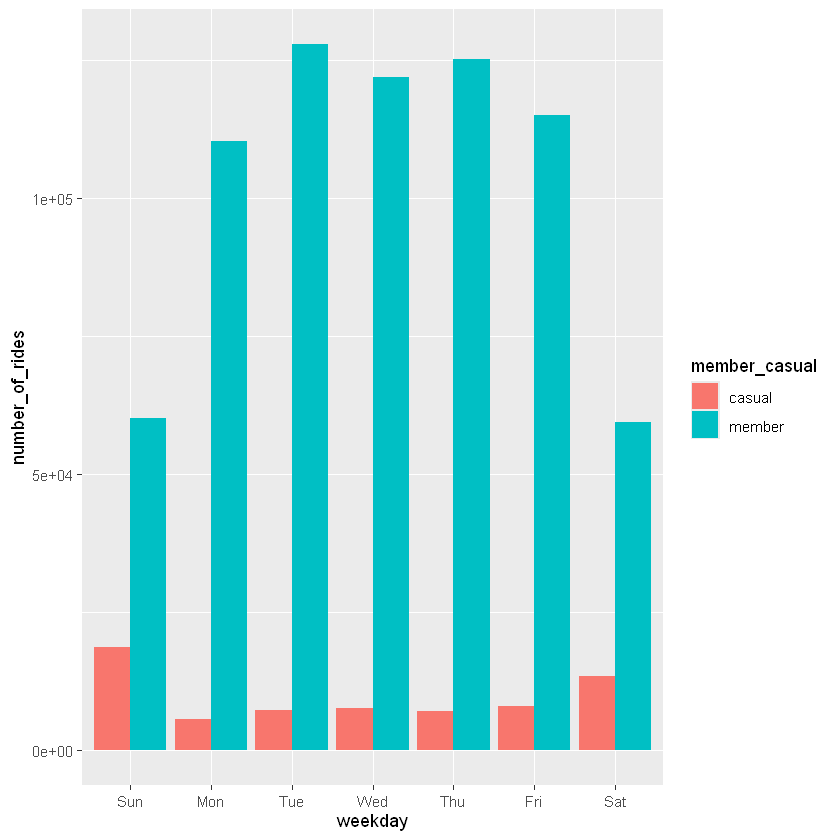

In [30]:
## ----------------------------------------------------------------------------------------------------------------------
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")

### Visualizing the average duration by member types and weekday

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.


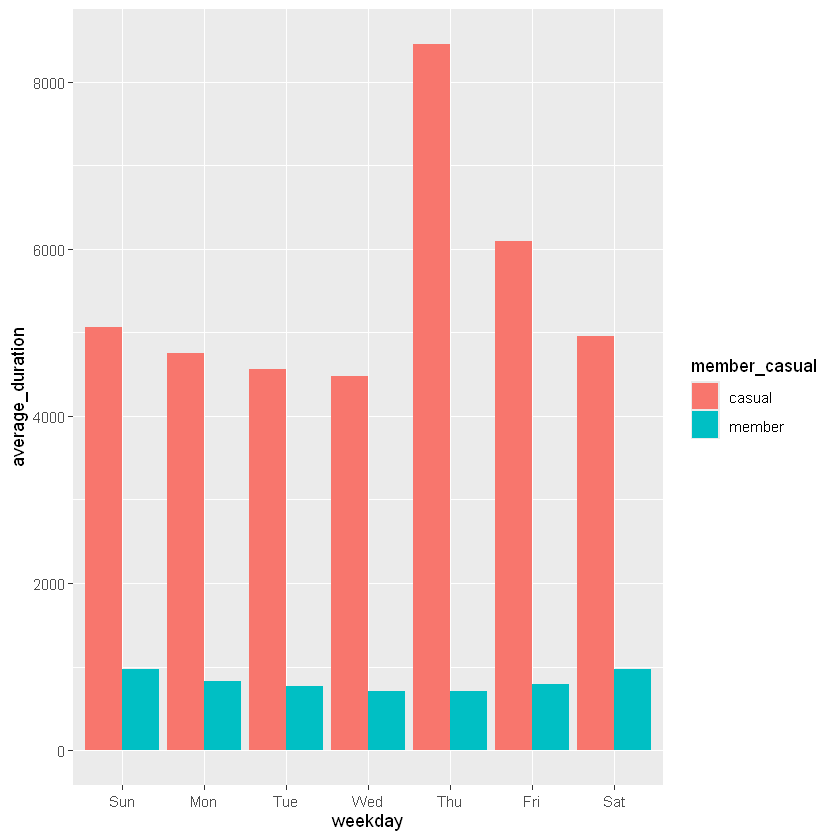

In [31]:
## ----------------------------------------------------------------------------------------------------------------------
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")

# Step 5: Export summary file for further analysis
### Creating a csv file (average ride length)

In [32]:
## ----------------------------------------------------------------------------------------------------------------------
counts <- aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)
write.csv(counts, file = "C:/Users/user/Desktop/avg_ride_length.csv")